In [1]:
import pandas as pd
import numpy as np

import utils

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

# Ravel Nugent Score

## Refseq OTU

In [2]:
task = 'Ravel Nugent Low/High Refseq OTU'
folder = 'ravel-nugent'

In [3]:
num_features = 588
weights = (1, -1)

In [4]:
df1 = pd.read_csv('./'+folder+'/6M6BA6_ravel_20210215_11_21_38/best_test.csv', sep=';') # NoRel+NoCLR
df2 = pd.read_csv('./'+folder+'/XH50A8_ravel_20210215_12_31_51/best_test.csv', sep=';') # Rel+NoCLR
df3 = pd.read_csv('./'+folder+'/0S16PA_ravel_20210215_12_50_21/best_test.csv', sep=';') # NoRel+CLR

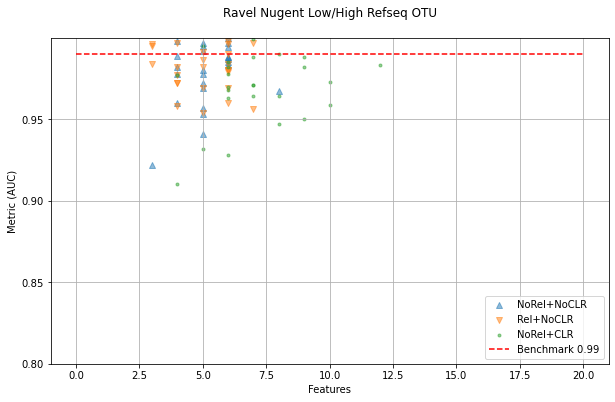

In [5]:
utils.plot(df1, df2, df3, 'num_genes', 'metric', num_features, weights, title=task, subtitle='', baseline=0.99, filename='./plots/ravel_nugent_refseq_otu.png', xmax=20, ylim=(0.8, 1))

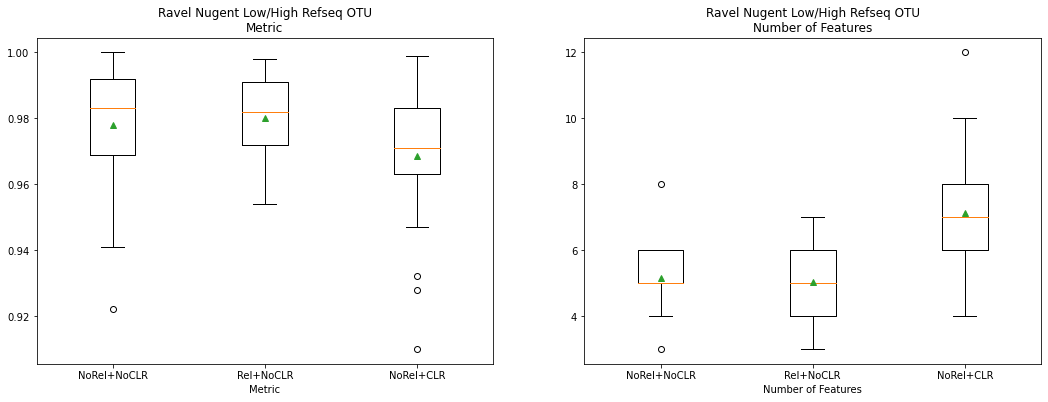

In [6]:
utils.boxplot(df1, df2, df3, num_features, weights, task, filename='./plots/ravel_nugent_boxplot_refseq_otu.png')

In [7]:
d = {
    'NoRel+NoCLR': utils.all(df1, num_features, weights).sort_values('metric', ascending=False),
    'Rel+NoCLR': utils.all(df2, num_features, weights).sort_values('metric', ascending=False),
    'NoRel+CLR': utils.all(df3, num_features, weights).sort_values('metric', ascending=False)
}

---

In [8]:
import sys 
sys.path.append('../src')

import dataset
import config
import run_best_features
from tasks import *

import ast

In [9]:
n = 100

In [10]:
# Experiment 1

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''

data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data1, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (342, 588)


In [11]:
# Experiment 2

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''

data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'Rel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data2, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (342, 588)


In [12]:
# Experiment 3

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'

data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+CLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data3, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (342, 588)


In [13]:
d['NoRel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
4,3,4,0.998,0.991,"[119, 326, 331, 490]",0.991,0.991,"[0.988, 0.991, 0.984, 0.999, 0.99, 0.988, 0.98...",0.986,0.944,1.0,0.010
45,23,5,0.969,0.961,"[157, 159, 326, 331, 490]",0.960,0.960,"[0.992, 0.975, 0.983, 0.994, 0.992, 0.995, 1.0...",0.985,0.903,1.0,0.014
1,1,5,0.972,0.964,"[119, 159, 169, 329, 490]",0.963,0.963,"[0.985, 0.982, 0.987, 0.961, 0.967, 0.996, 0.9...",0.985,0.929,1.0,0.013
40,19,4,0.978,0.971,"[157, 159, 326, 490]",0.971,0.971,"[0.994, 0.985, 0.981, 0.989, 0.983, 0.991, 0.9...",0.984,0.911,1.0,0.015
39,18,5,0.980,0.972,"[157, 158, 212, 326, 490]",0.971,0.971,"[1.0, 0.981, 0.99, 0.982, 0.982, 0.991, 1.0, 0...",0.984,0.943,1.0,0.013


In [14]:
d['Rel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
25,12,6,0.998,0.988,"[157, 159, 226, 326, 439, 490]",0.988,0.988,"[0.981, 0.987, 0.985, 0.987, 0.992, 0.967, 0.9...",0.985,0.936,1.0,0.012
48,19,7,0.997,0.985,"[128, 159, 162, 169, 226, 490, 534]",0.985,0.985,"[0.989, 0.992, 0.993, 0.998, 0.99, 0.991, 0.99...",0.984,0.914,1.0,0.015
46,18,4,0.982,0.975,"[157, 159, 326, 490]",0.975,0.975,"[0.95, 0.979, 0.987, 0.994, 0.988, 0.965, 0.99...",0.983,0.900,1.0,0.016
18,6,5,0.969,0.961,"[158, 159, 226, 326, 490]",0.960,0.960,"[0.995, 0.995, 0.998, 0.973, 1.0, 0.987, 0.997...",0.983,0.938,1.0,0.012
56,22,6,0.979,0.969,"[156, 159, 162, 326, 459, 490]",0.969,0.969,"[0.979, 0.994, 0.982, 0.995, 0.982, 0.99, 0.99...",0.982,0.904,1.0,0.015


In [15]:
d['NoRel+CLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
13,9,8,0.990,0.976,"[71, 129, 157, 159, 249, 285, 326, 490]",0.976,0.976,"[0.976, 0.989, 0.996, 0.973, 0.989, 0.977, 0.9...",0.983,0.924,1.0,0.013
35,21,7,0.988,0.976,"[61, 157, 159, 213, 326, 457, 490]",0.976,0.976,"[0.979, 0.999, 0.976, 0.992, 0.999, 0.997, 0.9...",0.983,0.893,1.0,0.017
3,3,6,0.982,0.972,"[157, 159, 213, 326, 331, 490]",0.972,0.972,"[0.981, 0.998, 0.936, 0.996, 0.951, 0.997, 0.9...",0.983,0.936,1.0,0.012
34,20,6,0.985,0.975,"[138, 159, 326, 334, 407, 490]",0.975,0.975,"[0.953, 0.987, 0.966, 0.923, 0.994, 0.962, 0.9...",0.981,0.890,1.0,0.017
25,16,4,0.910,0.903,"[157, 159, 212, 490]",0.903,0.903,"[0.965, 0.941, 0.955, 0.997, 0.981, 0.961, 0.9...",0.980,0.907,1.0,0.017


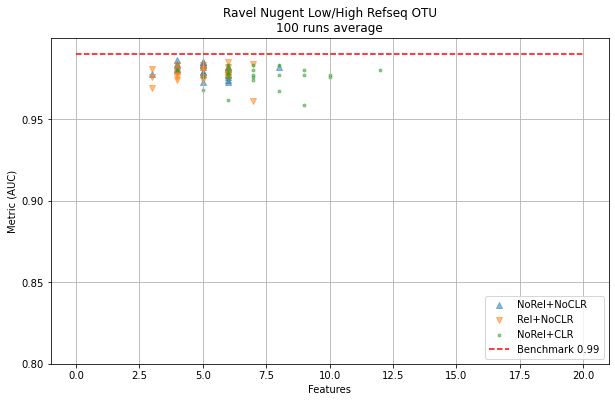

In [16]:
utils.plot(d['NoRel+NoCLR'], d['Rel+NoCLR'], d['NoRel+CLR'], 'num_genes', 'avg_n', num_features, weights, title=task, subtitle='100 runs average', baseline=0.99, filename='./plots/ravel_nugent_refseq_otu_avg_n.png', xmax=20, ylim=(0.8, 1))

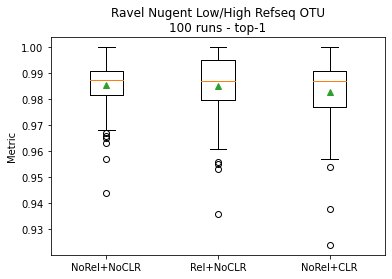

In [17]:
utils.boxplot_nruns_top1(d, title=task, subtitle='100 runs - top-1', filename='./plots/ravel_nugent_boxplot_nruns_top1_refseq_otu.png')

---

In [4]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('../src')

import utils

import dataset
import config
import run_best_features
from tasks import *

import ast

In [5]:
folder = 'ravel-nugent'
top_n = 5
n = 100

stats = {
    'NoRel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+NoCLR.tsv', sep='\t'),
    'Rel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_Rel+NoCLR.tsv', sep='\t'),
    'NoRel+CLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+CLR.tsv', sep='\t'),
}

best_n = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

In [6]:
config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''
data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+NoCLR'], i)
    res = run_best_features.run(config, data1, top_n_features, n)
    best_n['NoRel+NoCLR'].append(np.round(np.mean(res), 3))

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''
data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['Rel+NoCLR'], i)
    res = run_best_features.run(config, data2, top_n_features, n)
    best_n['Rel+NoCLR'].append(np.round(np.mean(res), 3))

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'
data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+CLR'], i)
    res = run_best_features.run(config, data3, top_n_features, n)
    best_n['NoRel+CLR'].append(np.round(np.mean(res), 3))

Final dataset shape: (342, 588)
Final dataset shape: (342, 588)
Final dataset shape: (342, 588)


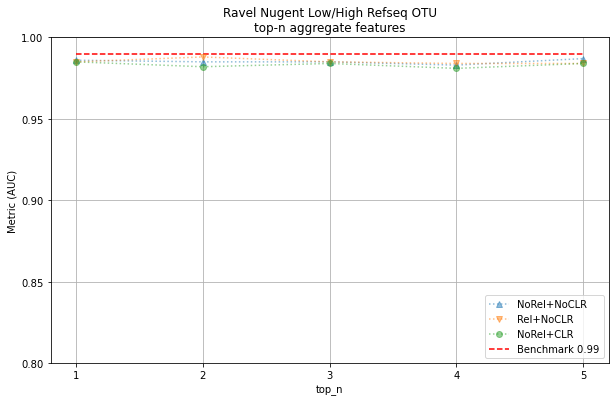

In [7]:
utils.plot_nruns_topn(best_n, title=task, subtitle='top-n aggregate features', baseline=0.99, filename='./plots/ravel_nugent_nruns_topn_refseq_otu.png', xmax=(top_n-1), ylim=(0.8, 1.0001), top_n=top_n)

In [8]:
best_n

{'NoRel+NoCLR': [0.986, 0.985, 0.985, 0.983, 0.987],
 'Rel+NoCLR': [0.985, 0.988, 0.985, 0.984, 0.984],
 'NoRel+CLR': [0.985, 0.982, 0.984, 0.981, 0.984]}

---

In [9]:
import importlib
importlib.reload(run_best_features)
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\mikel\\Documents\\MScAI\\Sem4\\proposal-draft\\microbiome\\microbiome-analysis\\output\\utils.py'>

In [25]:
experiment = 'NoRel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)
_ = run_best_features.run(config, data1, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.007        NR_041941.1_Anaerococcus_tetradius_strain_CCUG_46590_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0142       NR_113096.1_Prevotella_bivia_strain_JCM_6331_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0255       NR_043894.1_Prevotella_timonensis_strain_4401737_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0333       NR_113091.1_Porphyromonas_uenonis_strain_JCM_13868_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0677       NR_113098.1_Prevotella_buccalis_strain_JCM_12246_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0759       NR_041796.1_Lactobacillus_vaginalis_strain_ATCC_49540_16S_ribosomal_RNA_gene__partial_sequence
          -            0.2027       NR_118342.1_Sneathia_sanguinegens_strain_CCUG_41628_16S_ribosomal_RNA_gene__complete_sequence
          -            0.2203       NR_118377.1_Gardnerella_va

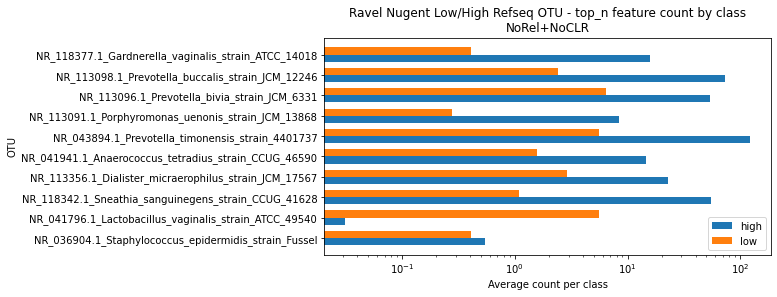

In [26]:
features = data1.features[top_n_features]
filename = f'./plots/ravel_nugent_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data1, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('high', 'low'), figsize=(8,4), filename=filename, clean_otu=True)

In [27]:
experiment = 'Rel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

_ = run_best_features.run(config, data2, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0162       NR_041941.1_Anaerococcus_tetradius_strain_CCUG_46590_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0301       NR_116346.1_Peptoniphilus_duerdenii_strain_WAL_18896_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0534       NR_113091.1_Porphyromonas_uenonis_strain_JCM_13868_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0536       NR_041920.1_Lactobacillus_gasseri_strain_ATCC_33323_16S_ribosomal_RNA_gene__complete_sequence
          -            0.0557       NR_041800.1_Lactobacillus_crispatus_strain_ATCC_33820_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0658       NR_104506.1_Gemella_asaccharolytica_strain_WAL_1945J_16S_ribosomal_RNA_gene__partial_sequence
          -            0.075        NR_041796.1_Lactobacillus_vaginalis_strain_ATCC_49540_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1716       NR_118377

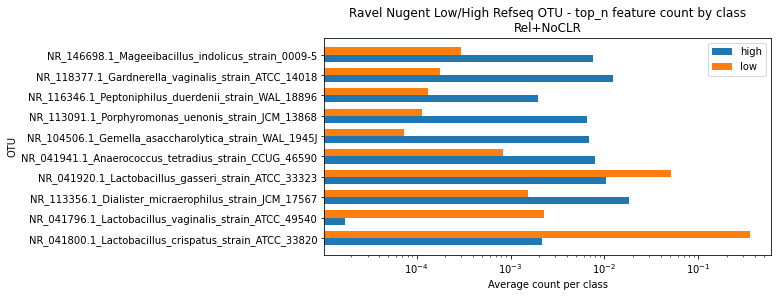

In [28]:
features = data2.features[top_n_features]
filename = f'./plots/ravel_nugent_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data2, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('high', 'low'), figsize=(8,4), filename=filename, clean_otu=True)

In [29]:
experiment = 'NoRel+CLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

_ = run_best_features.run(config, data3, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0294       NR_113091.1_Porphyromonas_uenonis_strain_JCM_13868_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1268       NR_041796.1_Lactobacillus_vaginalis_strain_ATCC_49540_16S_ribosomal_RNA_gene__partial_sequence
          -            0.4154       NR_118377.1_Gardnerella_vaginalis_strain_ATCC_14018_16S_ribosomal_RNA_gene__partial_sequence
          -            0.4283       NR_113356.1_Dialister_micraerophilus_strain_JCM_17567_16S_ribosomal_RNA_gene__partial_sequence



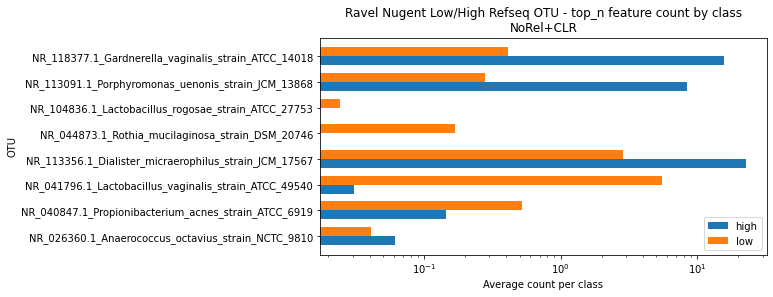

In [30]:
features = data3.features[top_n_features]
filename = f'./plots/ravel_nugent_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data3, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('high', 'low'), figsize=(8,4), filename=filename, clean_otu=True)